# Breast Cancer Data Exploration.

🔹 First 5 rows:
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38

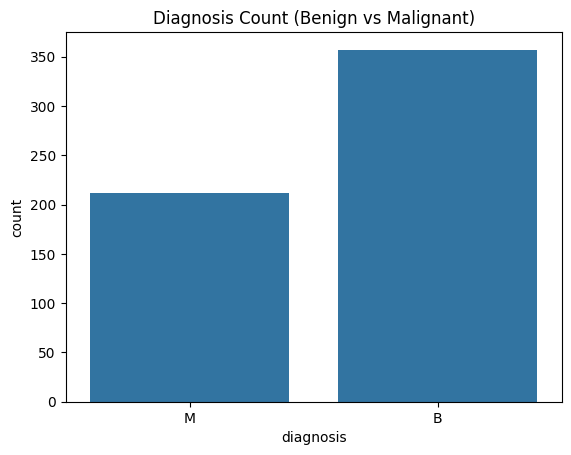


📌 Correlation with 'diagnosis':
diagnosis_num              1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.07

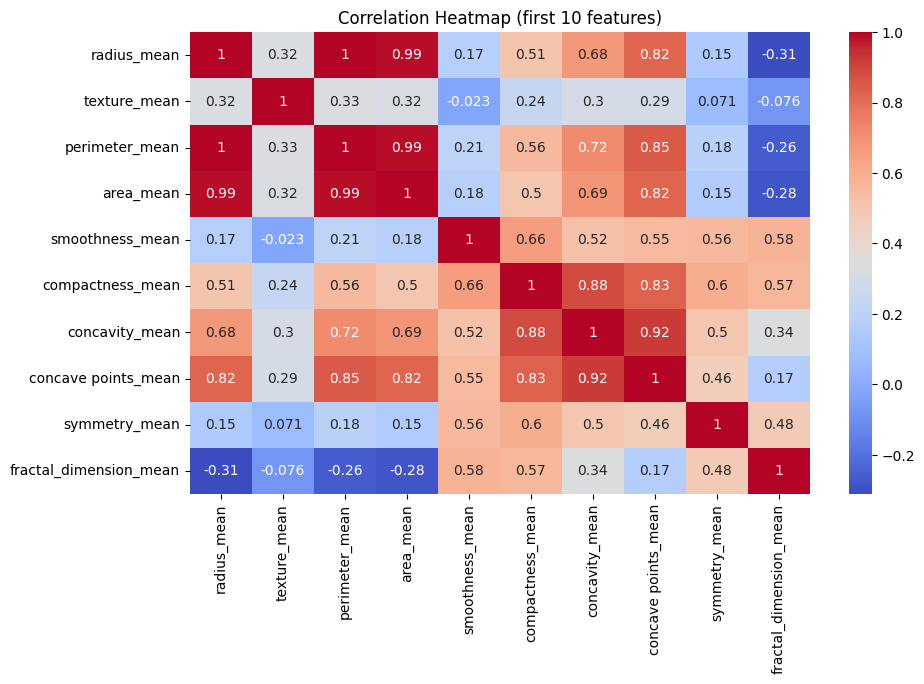


🧪 Radius Mean Summary:
count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

🧪 Texture Mean Summary:
count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture_mean, dtype: float64


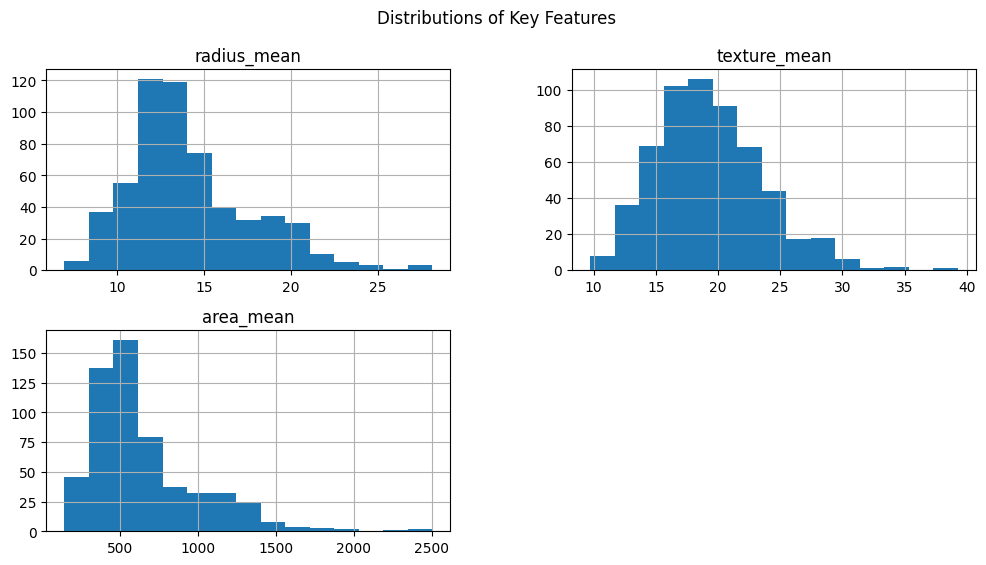

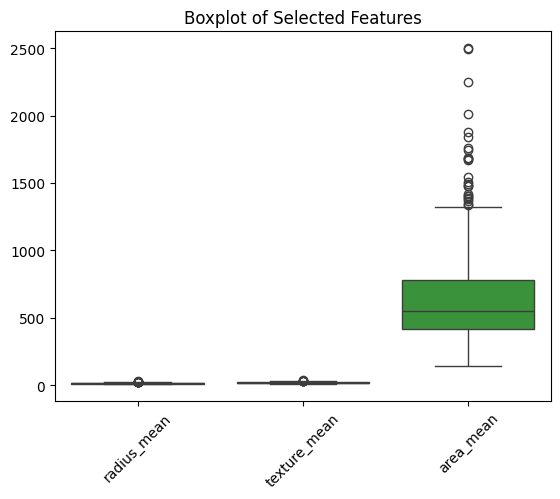

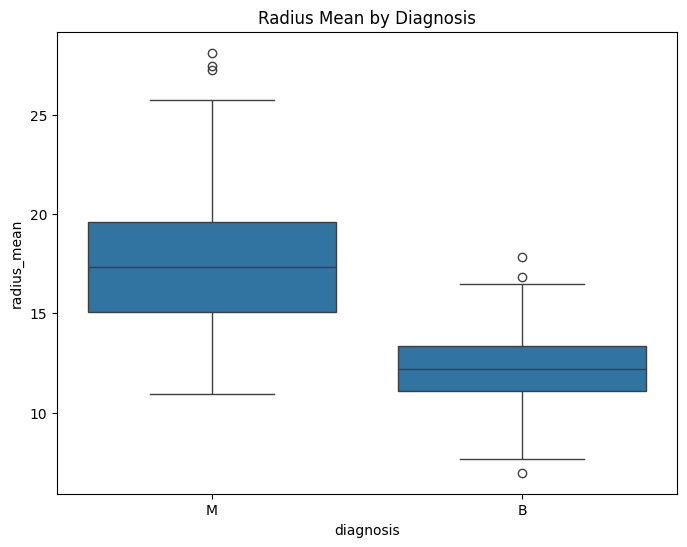

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
cancer = pd.read_csv("/content/sample_data/breast-cancer.csv")

# Drop unnecessary columns
cancer = cancer.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Show first 5 rows
print("🔹 First 5 rows:")
print(cancer.head())

# 1. Diagnosis count
print("\n📊 Diagnosis count:")
print(cancer['diagnosis'].value_counts())

sns.countplot(data=cancer, x='diagnosis')
plt.title("Diagnosis Count (Benign vs Malignant)")
plt.show()

# 2. Correlation with diagnosis (encoded)
cancer['diagnosis_num'] = cancer['diagnosis'].map({'M': 1, 'B': 0})
print("\n📌 Correlation with 'diagnosis':")
print(cancer.corr(numeric_only=True)['diagnosis_num'].sort_values(ascending=False))

# Correlation heatmap (first 10 features for clarity)
plt.figure(figsize=(10,6))
sns.heatmap(cancer.iloc[:,1:11].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (first 10 features)")
plt.show()

# 3. Feature summaries
print("\n🧪 Radius Mean Summary:")
print(cancer['radius_mean'].describe())

print("\n🧪 Texture Mean Summary:")
print(cancer['texture_mean'].describe())

# Histograms for some key features
features = ['radius_mean', 'texture_mean', 'area_mean']
cancer[features].hist(bins=15, figsize=(12, 6))
plt.suptitle("Distributions of Key Features")
plt.show()

# 4. Boxplots
sns.boxplot(data=cancer[['radius_mean','texture_mean','area_mean']])
plt.title("Boxplot of Selected Features")
plt.xticks(rotation=45)
plt.show()

# Boxplot grouped by diagnosis
plt.figure(figsize=(8,6))
sns.boxplot(x='diagnosis', y='radius_mean', data=cancer)
plt.title("Radius Mean by Diagnosis")
plt.show()
